In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15132, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15132 (delta 26), reused 44 (delta 20), pack-reused 15073
Receiving objects: 100% (15132/15132), 13.47 MiB | 16.77 MiB/s, done.
Resolving deltas: 100% (10271/10271), done.


In [4]:
%cd darknet

# For making of darknet with Opencv and GPU as true ( if you have GPU enabled hardware )

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# For making of darknet with only Opencv as true ( if your hardware doesnt have GPU )

#!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

/content/darknet


In [5]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [6]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [8]:
!wget https://pjreddie.com/media/files/yolov3.weights

def Show(path):

  image = cv2.imread(path)

  plot = plt.gcf()
  plot.set_size_inches(9, 5)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

--2021-06-22 12:10:32--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  70.0MB/s    in 3.6s    

2021-06-22 12:10:36 (65.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights ../mouse.jpeg

/bin/bash: ./darknet: No such file or directory


In [ ]:
Show('predictions.jpg')

In [7]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

/content
Mounted at /content/gdrive


**Starting to Train Yolov3 Model with custom dataset** 

*Importing and Unziping the train images and annotations*

In [9]:
!ls gdrive/MyDrive/Custom_Yolo

backup	obj.data  obj.names  obj.zip  train.txt  yolov3_custom.cfg


In [10]:
%cd darknet
!unzip ../gdrive/MyDrive/Custom_Yolo/obj.zip -d data/

/content/darknet
Archive:  ../gdrive/MyDrive/Custom_Yolo/obj.zip
  inflating: data/obj/00038a568acc699b.jpg  
  inflating: data/obj/00038a568acc699b.txt  
  inflating: data/obj/00042880c9c2aaaf.jpg  
  inflating: data/obj/00042880c9c2aaaf.txt  
  inflating: data/obj/000db8328068a829.jpg  
  inflating: data/obj/000db8328068a829.txt  
  inflating: data/obj/000e15227e915196.jpg  
  inflating: data/obj/000e15227e915196.txt  
  inflating: data/obj/001104dcc402b037.jpg  
  inflating: data/obj/001104dcc402b037.txt  
  inflating: data/obj/001263d35122afde.jpg  
  inflating: data/obj/001263d35122afde.txt  
  inflating: data/obj/0012f1c145573ce2.jpg  
  inflating: data/obj/0012f1c145573ce2.txt  
  inflating: data/obj/0013040bccfb3c90.jpg  
  inflating: data/obj/0013040bccfb3c90.txt  
  inflating: data/obj/0015a40332faf225.jpg  
  inflating: data/obj/0015a40332faf225.txt  
  inflating: data/obj/0017506ee379bd12.jpg  
  inflating: data/obj/0017506ee379bd12.txt  
  inflating: data/obj/0024b02259695

*Copying custom configuration file for yolov3 from G-Drive (Assuming already made custom cfg file)*

In [11]:
!cp ../gdrive/MyDrive/Custom_Yolo/yolov3_custom.cfg cfg/yolov3.cfg

*Copying custom .data and .names file from G-Drive*

In [12]:
#%cd darknet
!cp ../gdrive/MyDrive/Custom_Yolo/obj.data data/
!cp ../gdrive/MyDrive/Custom_Yolo/obj.names data/

*Copying Train text file from G-Drive ( Contains path to all the train images )*

In [13]:
!cp ../gdrive/MyDrive/Custom_Yolo/train.txt data/

*Downloading convolutional weights from pjreddie website as 74 file*

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-06-08 17:50:41--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-06-08 17:50:41--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  36.8MB/s    in 4.7s    

2021-06-08 17:50:46 (33.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**Training The model**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74 -dont_show

To Continuing training your model using the saved weights in the gdrive as backup

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3.cfg ../gdrive/MyDrive/Custom_Yolo/backup/yolov3_last.weights -dont_show 

Streaming output truncated to the last 5000 lines.
 total_bbox = 63791, rewritten_bbox = 0.217899 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.814226), count: 4, class_loss = 0.066905, iou_loss = 0.135381, total_loss = 0.202286 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.773230), count: 3, class_loss = 0.264721, iou_loss = 0.135534, total_loss = 0.400255 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.697537), count: 1, class_loss = 0.032039, iou_loss = 0.101279, total_loss = 0.133317 
 total_bbox = 63799, rewritten_bbox = 0.217872 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000214, iou_loss = 0.000000, total_loss = 0.000214 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.674160), count: 5, class_loss = 0.653760, iou_loss = 0.397042, total_loss = 1.050802 
v3 (mse 

In [ ]:
Show('chart.png')

**Testing the trained model**

In [14]:
# Object detecting using the custom-trained weights 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3.cfg

%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

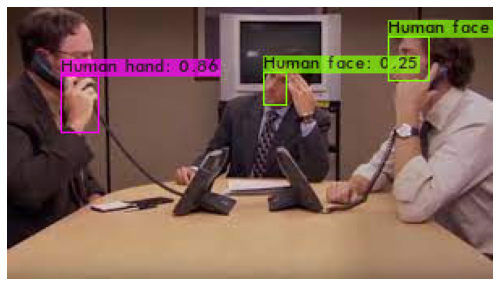

In [19]:
!./darknet detector test data/obj.data cfg/yolov3.cfg ../gdrive/MyDrive/Custom_Yolo/backup/yolov3_last.weights ../office.jfif -thresh 0.25 -dont_show
Show('predictions.jpg')

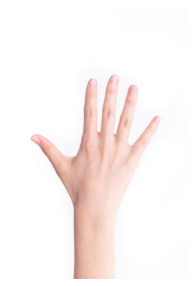

In [9]:
!ls

bin	 datalab  home	 lib64	opt   run   sys		       tools
boot	 dev	  lib	 media	proc  sbin  tensorflow-1.15.2  usr
content  etc	  lib32  mnt	root  srv   tmp		       var


In [10]:
%cd content

/content
